In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import matplotlib

In [2]:
def k_means(points, k):
    maxiter = 100
    def initialize_centroids(points, k):
        centroids = points.copy()
        np.random.shuffle(centroids)
        return centroids[:k]
    def closest_centroid(points, centroids):
        distances = np.sqrt(((points - centroids[:, np.newaxis])**2).sum(axis=2))
        return np.argmin(distances, axis=0)
    def move_centroids(points, closest, centroids):
        return np.array([points[closest==k].mean(axis=0) for k in range(centroids.shape[0])])
    centroids = initialize_centroids(points, k)
    for j in range(0, maxiter):
        CC = closest_centroid(points, centroids)
        centroids = move_centroids(points, CC, centroids)
    return CC

## WINE

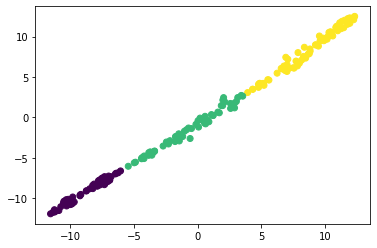

In [8]:
columns = np.arange(0,14)
cols_to_use = [i for i in range(1, 14)]
wine = pd.read_csv("wine.data", names=columns, usecols=cols_to_use).to_numpy()
k = 3
classes = k_means(wine, k)
group_colors = np.random.randn(k)
colors = [group_colors[j] for j in classes]

wine_v = TSNE().fit_transform(wine)
plt.scatter(wine_v[:,0], wine_v[:,1], c=colors)

## IRIS

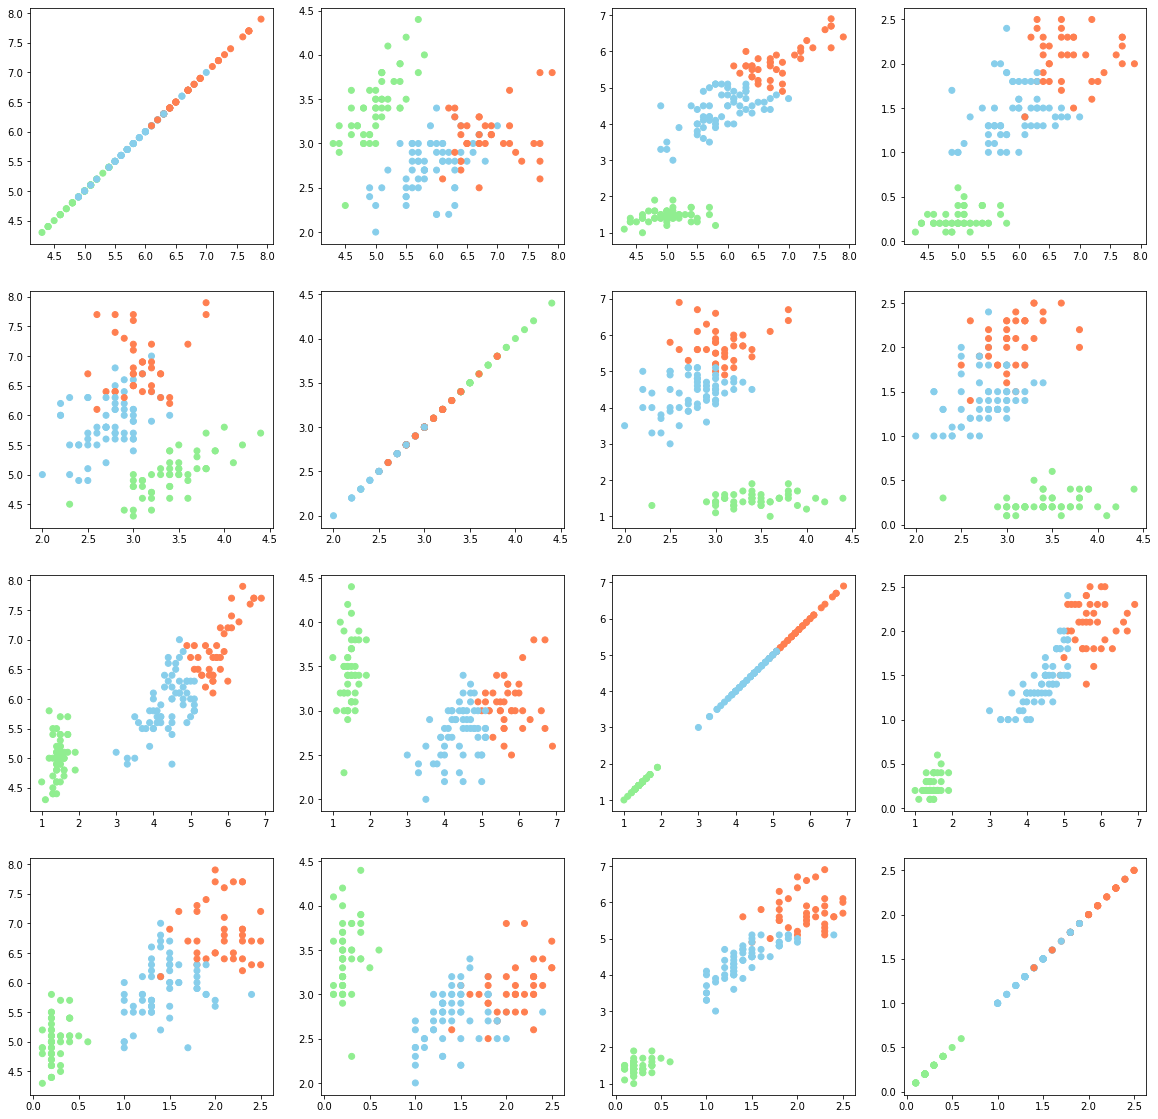

In [9]:
from sklearn import datasets
iris = datasets.load_iris()
k = 3
classes = k_means(iris.data, k)

group_colors = ['skyblue', 'coral', 'lightgreen', 'black', 'purple', 'red']
colors = [group_colors[j] for j in classes]

plot = plt.figure(figsize=(20, 20));
for i in range(4):
    for j in range(4):
        plt.subplot(4, 4, i*4+j+1)
        plt.scatter(iris.data[:,i], iris.data[:,j], color=colors)

## ABALONE - SŁUCHOTKI

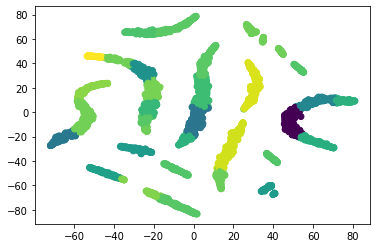

In [10]:
columns = np.arange(0,9)
abalone = pd.read_csv("abalone.data", names=columns, usecols=range(1, 9)).to_numpy()
k=29
classes = k_means(abalone, k)
group_colors = np.random.randn(k)
colors = [group_colors[j] for j in classes]

abalone_v = TSNE().fit_transform(abalone)
plt.scatter(abalone_v[:,0], abalone_v[:,1], c=colors)

## Wisconsin Diagnostic Breast Cancer

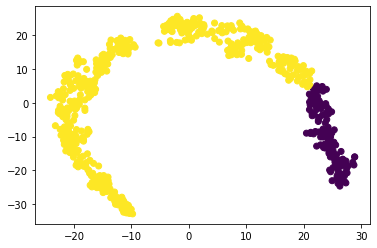

In [16]:
columns = np.arange(3,33)
wdbc = pd.read_csv("wdbc.data", names=columns).to_numpy()
k=2
classes = k_means(wdbc, k)
group_colors = np.random.randn(k)
colors = [group_colors[j] for j in classes]

wdbc_v = TSNE().fit_transform(wdbc)
plt.scatter(wdbc_v[:,0], wdbc_v[:,1], c=colors)

In [17]:
print(classes[classes == 0].shape)
print(classes[classes == 1].shape)

(438,)
(131,)


## Transfusion

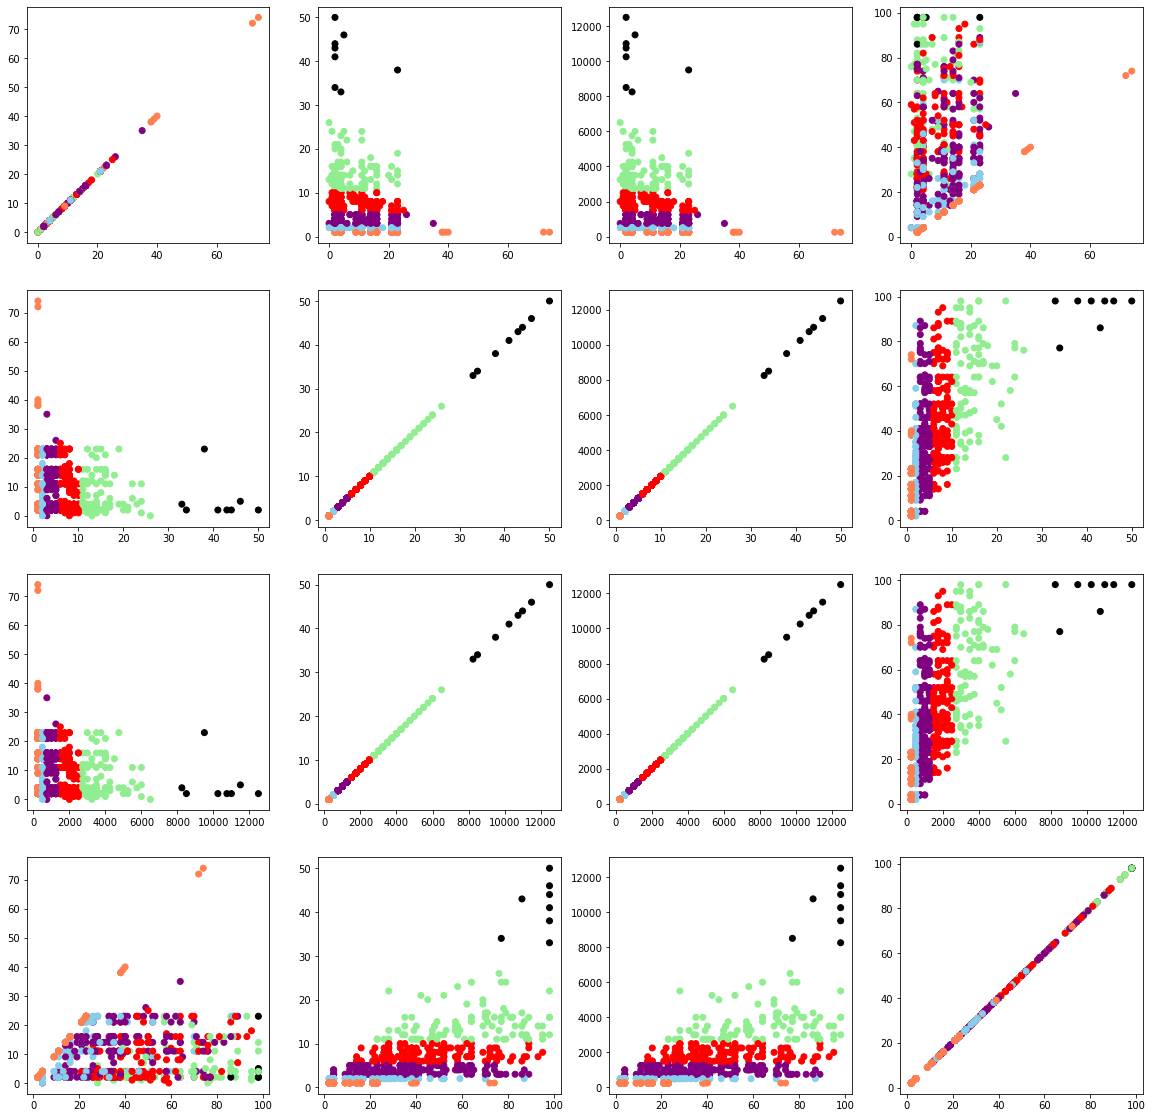

In [22]:
columns = np.arange(0,5)
wpbc = pd.read_csv("transfusion.data", names=columns, usecols=[0, 1, 2, 3], skiprows=1).to_numpy()
k=6
classes = k_means(wpbc, k)
group_colors = ['skyblue', 'coral', 'lightgreen', 'black', 'purple', 'red']
colors = [group_colors[j] for j in classes]

plot = plt.figure(figsize=(20, 20));
for i in range(4):
    for j in range(4):
        plt.subplot(4, 4, i*4+j+1)
        plt.scatter(wpbc[:,i], wpbc[:,j], color=colors)